<a href="https://colab.research.google.com/github/Tensor-Reloaded/Advanced-Topics-in-Neural-Networks-Template-2024/blob/main/Lab02/Augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torch import nn, Tensor


In [10]:
def get_images():
    image_urls = [
        "https://farm8.staticflickr.com/7391/9508838385_306f10a237_z.jpg",
        "https://farm4.staticflickr.com/3547/5699252415_24d8008079_z.jpg",
        "https://farm4.staticflickr.com/3792/9272498665_99f4732703_z.jpg",
        "https://farm8.staticflickr.com/7286/8740419241_787e3d0105_z.jpg",
        "https://farm8.staticflickr.com/7297/9653183700_85b62d8c73_z.jpg",
        "https://farm1.staticflickr.com/161/338279840_61ad5d471f_z.jpg",
        "https://farm9.staticflickr.com/8109/8551627508_0cc24ce9fb_z.jpg",
    ]
    return [Image.open(urlopen(url)) for url in image_urls]


In [11]:
class SampleDataset(Dataset):
    def __init__(self, images, transforms):
        self.images = images
        self.transforms = transforms

    def __len__(self):
        return len(self.images) * 2

    def __getitem__(self, i):
        return self.transforms(self.images[i // 2]), int(i > len(self.images))


In [12]:
def draw_all(to_draw, labels):
    to_pil = v2.ToPILImage()
    figure, axis = plt.subplots(1, len(to_draw), figsize=(10, 10))
    for i in range(len(to_draw)):
        axis[i].imshow(to_pil(to_draw[i]))
        label = labels[i]
        if isinstance(label, Tensor):
            label = label.tolist()
        if isinstance(label, list):
            label = [round(x, 2) for x in label]
        axis[i].set_title(label)
    plt.show()


In [13]:
transforms = nn.Sequential(
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((256, 256), antialias=True),
    v2.RandAugment(4, 8),
)

dataset = SampleDataset(get_images(), transforms)


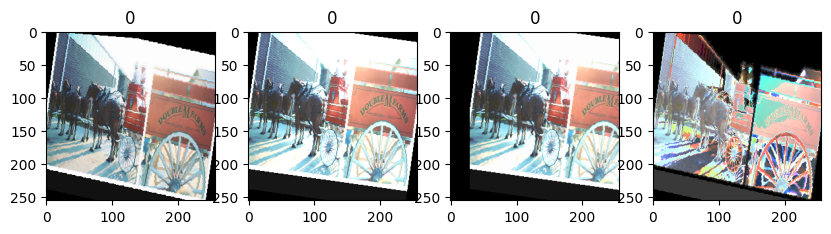

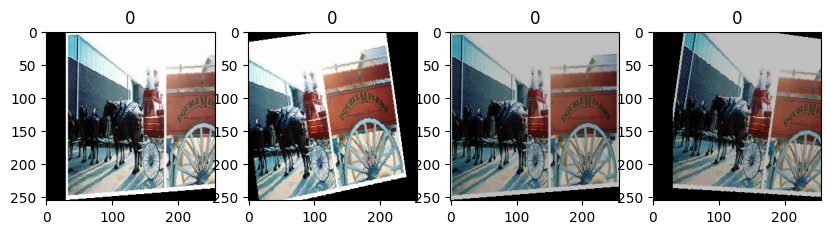

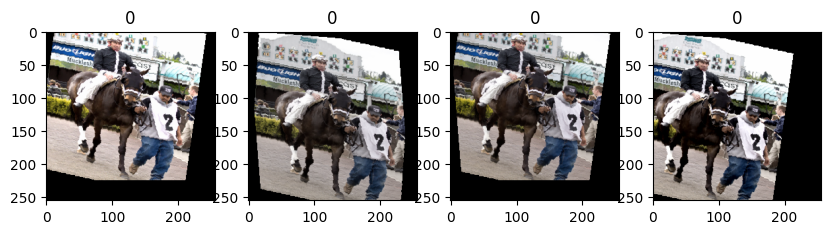

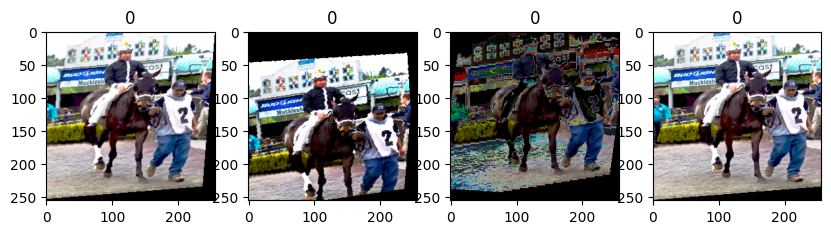

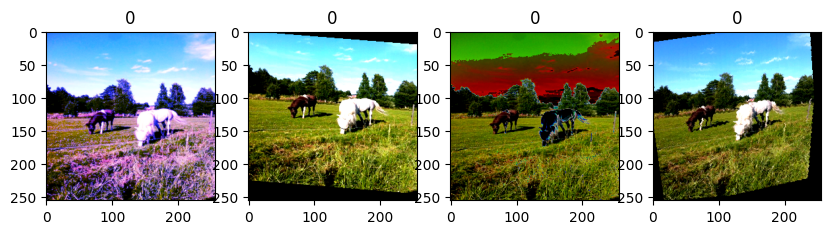

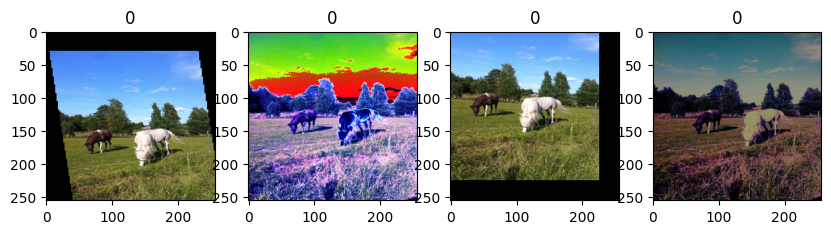

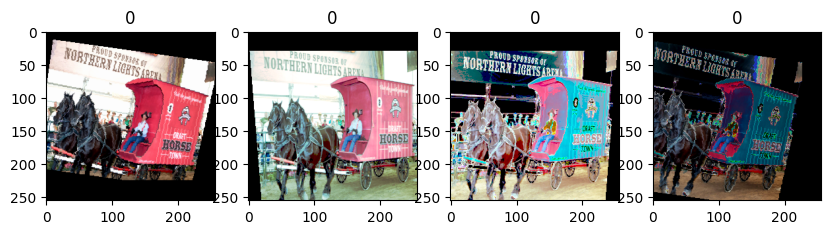

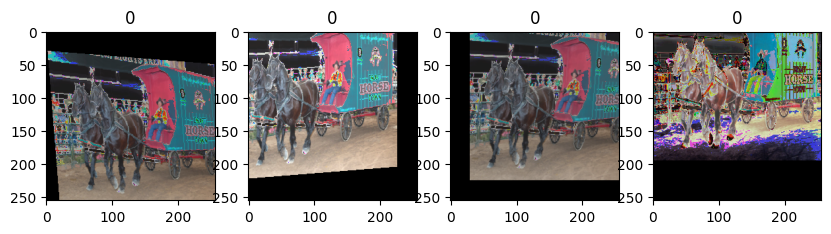

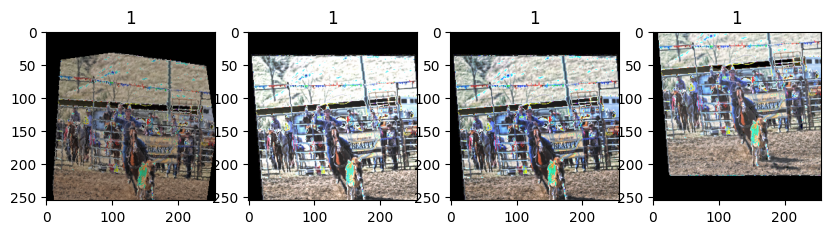

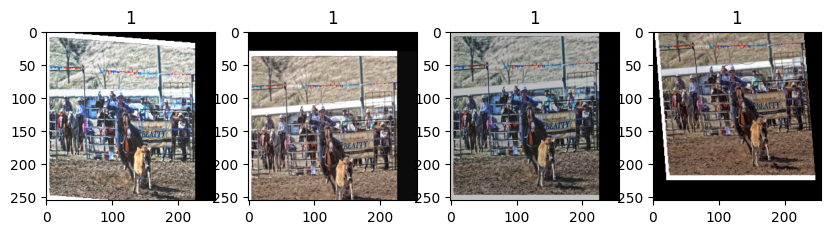

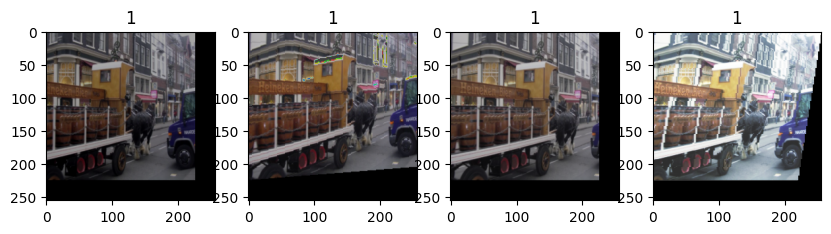

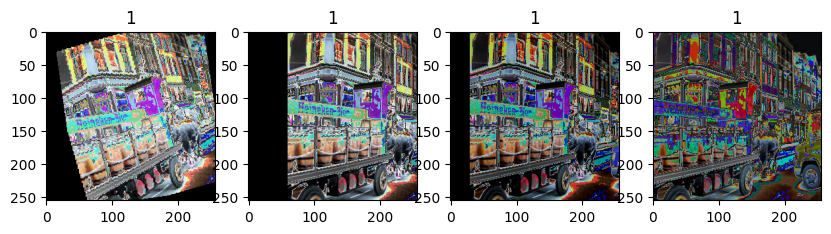

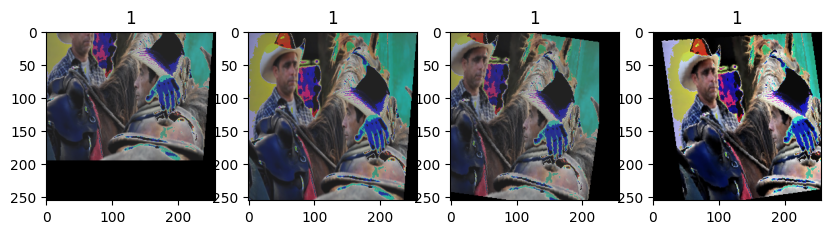

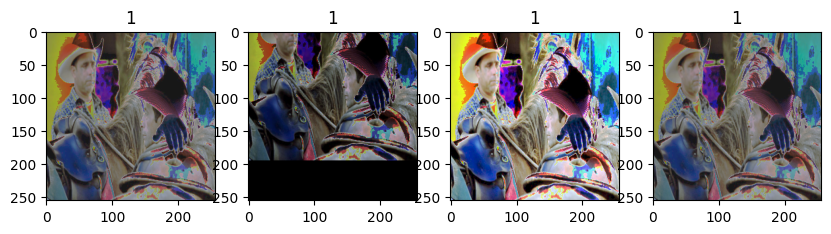

In [14]:
for data, label in dataset:
    to_draw = [transforms(data) for _ in range(4)]
    draw_all(to_draw, [label] * len(to_draw))


In [15]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
cutmix_or_mixup = v2.RandomChoice([v2.CutMix(num_classes=2), v2.MixUp(num_classes=2)])


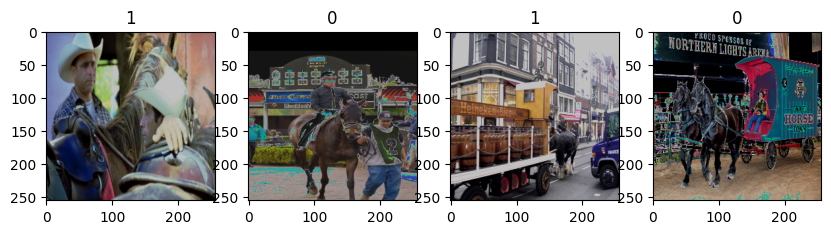

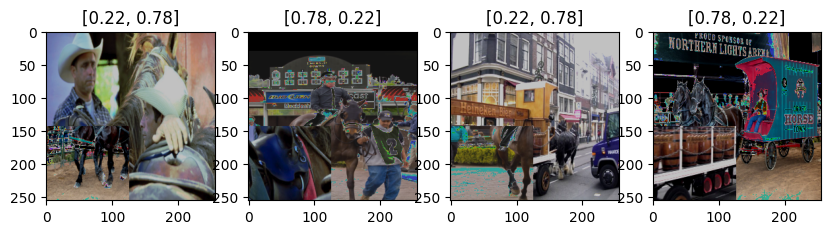

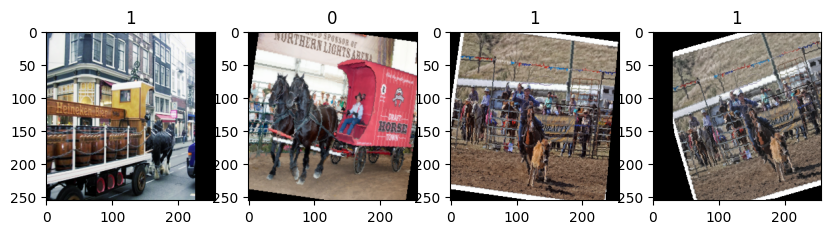

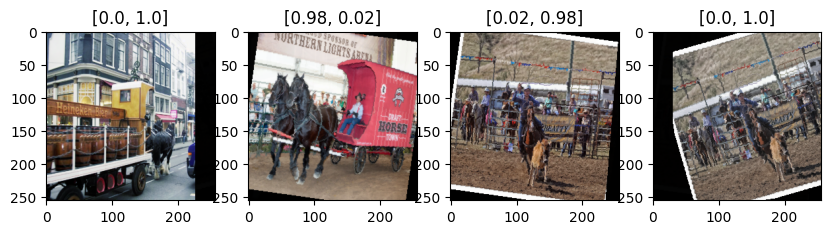

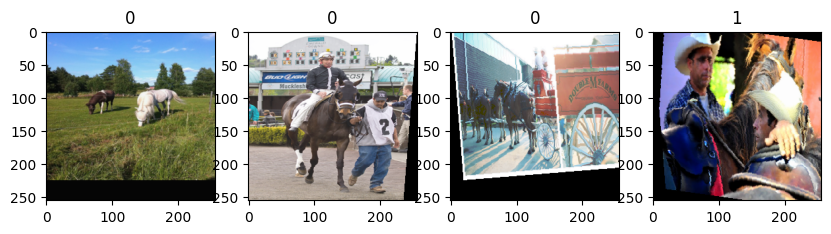

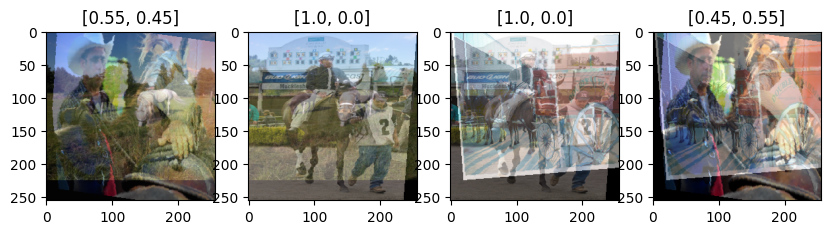

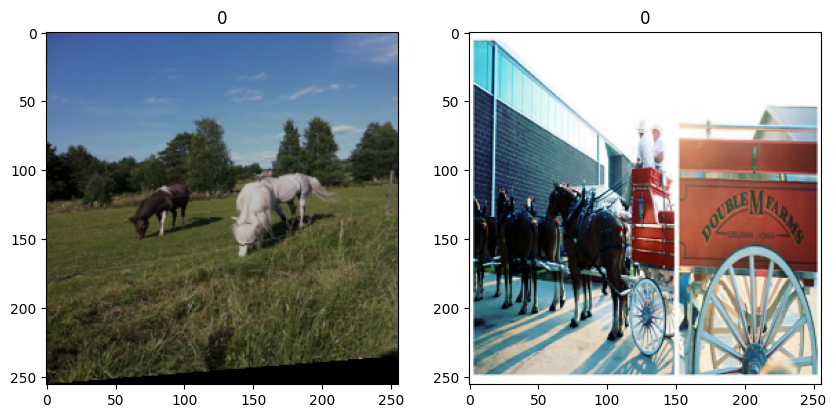

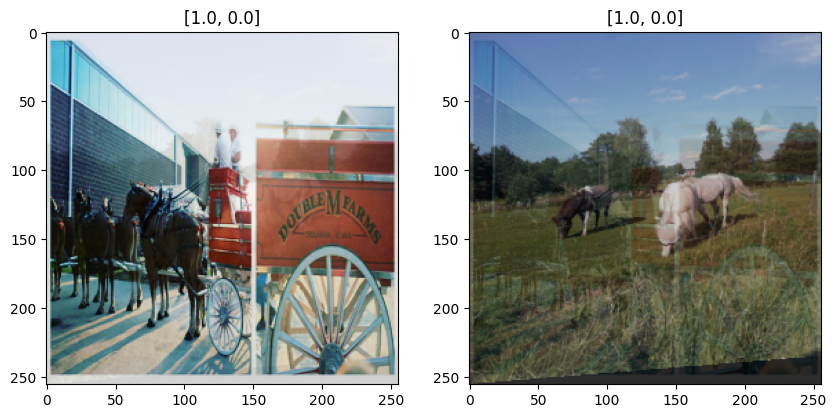

In [16]:
for images, labels in dataloader:
    draw_all(images, labels)
    images, labels = cutmix_or_mixup(images, labels)
    draw_all(images, labels)
